Warning message:
"package 'RSNNS' was built under R version 3.5.1"Loading required package: Rcpp


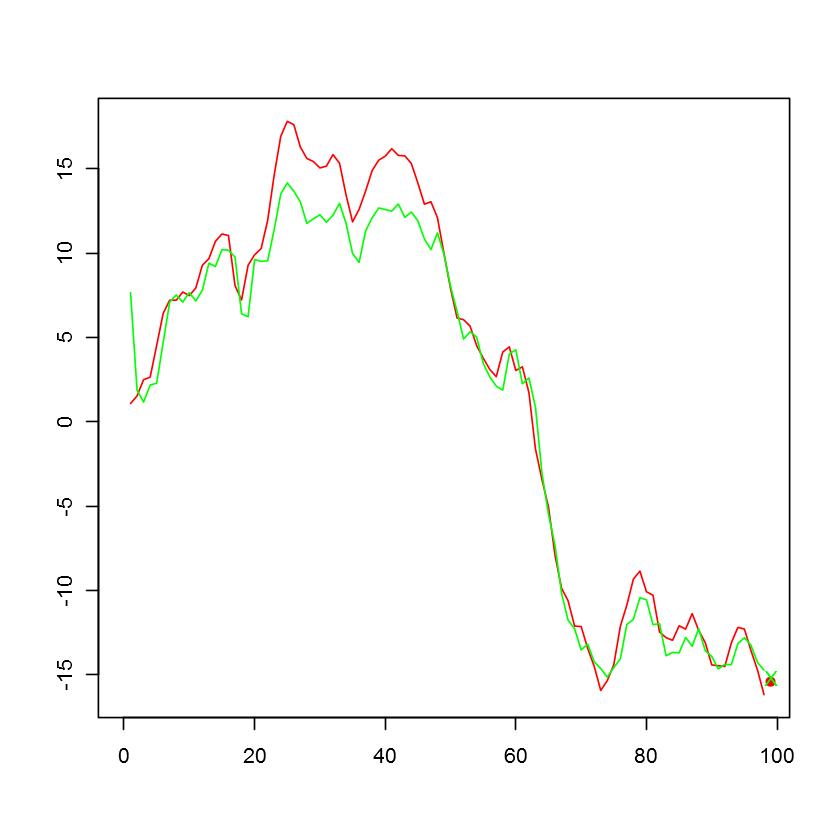

In [1]:
library(RSNNS)

#
# simulate an arima time series example of the length n
#
set.seed(10001)
n <- 100
ts.sim <- arima.sim(list(order = c(1,1,0), ar = 0.7), n = n-1)

#
# create an input data set for ts.sim
# sw = sliding-window size
#
# the last point of the time series will not be used
#   in the training phase, only in the prediction/validation phase
# 
sw <- 1
X <- lapply(sw:(n-2),
            function(ind){
              ts.sim[(ind-sw+1):ind]
            })
X <- do.call(rbind, X)
Y <- sapply(sw:(n-2),
            function(ind){
              ts.sim[ind+1]
            })

# used to validate prediction properties
# on the last point of the series
newX <- ts.sim[(n-sw):(n-1)]
newY <- ts.sim[n]

# build an elman network based on the input
model <- elman(X, Y,
               size = c(10, 10),
               learnFuncParams = c(0.001),
               maxit = 500,
               linOut = TRUE)

#
# plot the results
#
limits <- range(c(Y, model$fitted.values))

plot(Y, type = "l", col="red",
     ylim=limits, xlim=c(0, length(Y)),
     ylab="", xlab="")
lines(model$fitted.values, col = "green", type="l")

points(length(Y)+1, newY, col="red", pch=16)
points(length(Y)+1, predict(model, newdata=newX),
       pch="X", col="green")

